# **Introduction**

>The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

>## **Dataset Content :**
1. Geography: Worldwide
2. Time period: 1970-2017, except 1993
3. Unit of analysis: Attack
4. Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes
5. Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)
6. Definition of terrorism:
"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

>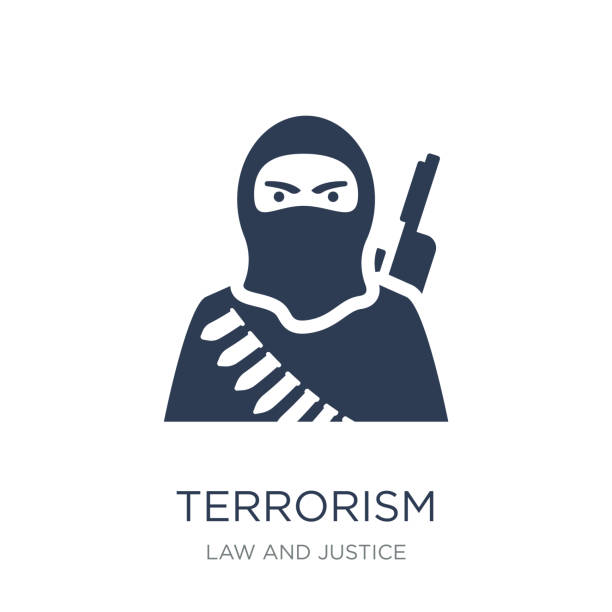

> For more information about dataset and problem : https://www.kaggle.com/START-UMD/gtd/

# **Importing Libraries and Dataset**



In [ ]:
!pip3 install pandas_profiling --upgrade    

In [ ]:
pip install datasist

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.3)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Global Terrorism Classification/globalterrorismdb_0718dist.csv',
                 encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -9         0      -9      NaN

[181691 rows x 135 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.describe()

eventid          iyear  ...       INT_MISC        INT_ANY
count  1.816910e+05  181691.000000  ...  181691.000000  181691.000000
mean   2.002705e+11    2002.638997  ...       0.090010      -3.945952
std    1.325957e+09      13.259430  ...       0.568457       4.691325
min    1.970000e+11    1970.000000  ...      -9.000000      -9.000000
25%    1.991021e+11    1991.000000  ...       0.000000      -9.000000
50%    2.009022e+11    2009.000000  ...       0.000000       0.000000
75%    2.014081e+11    2014.000000  ...       0.000000       0.000000
max    2.017123e+11    2017.000000  ...       1.000000       1.000000

[8 rows x 77 columns]

In [ ]:
df.head()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...        0         0       0      NaN
1  197000000002   1970       0     0  ...        1         1       1      NaN
2  197001000001   1970       1     0  ...       -9         1       1      NaN
3  197001000002   1970       1     0  ...       -9         1       1      NaN
4  197001000003   1970       1     0  ...       -9         1       1      NaN

[5 rows x 135 columns]

In [ ]:
df.sample(5)

eventid  ...                                            related
33227   198801240006  ...  198801240006, 198801240005, 198801240007, 1988...
176049  201706180014  ...           201706180013, 201706180014, 201706180015
40459   198911060012  ...                                                NaN
74763   200211130001  ...                         200211130001, 200211130002
125969  201401150073  ...                                                NaN

[5 rows x 135 columns]

In [ ]:
df.tail()

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -9         0      -9      NaN

[5 rows x 135 columns]

In [ ]:
df.drop('eventid',axis=1,inplace = True)

In [ ]:
df.shape

(181691, 134)

#**Analysis and Visualization**

In [ ]:
# Checking Null values
df.isnull().sum()

iyear              0
imonth             0
iday               0
approxdate    172452
extended           0
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 134, dtype: int64

In [ ]:
#Return percentage of missing values in each column  
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  -  {}%'.format(col, round(pct_missing*100)))

iyear  -  0%
imonth  -  0%
iday  -  0%
approxdate  -  95%
extended  -  0%
resolution  -  99%
country  -  0%
country_txt  -  0%
region  -  0%
region_txt  -  0%
provstate  -  0%
city  -  0%
latitude  -  3%
longitude  -  3%
specificity  -  0%
vicinity  -  0%
location  -  69%
summary  -  36%
crit1  -  0%
crit2  -  0%
crit3  -  0%
doubtterr  -  0%
alternative  -  84%
alternative_txt  -  84%
multiple  -  0%
success  -  0%
suicide  -  0%
attacktype1  -  0%
attacktype1_txt  -  0%
attacktype2  -  97%
attacktype2_txt  -  97%
attacktype3  -  100%
attacktype3_txt  -  100%
targtype1  -  0%
targtype1_txt  -  0%
targsubtype1  -  6%
targsubtype1_txt  -  6%
corp1  -  23%
target1  -  0%
natlty1  -  1%
natlty1_txt  -  1%
targtype2  -  94%
targtype2_txt  -  94%
targsubtype2  -  94%
targsubtype2_txt  -  94%
corp2  -  94%
target2  -  94%
natlty2  -  94%
natlty2_txt  -  94%
targtype3  -  99%
targtype3_txt  -  99%
targsubtype3  -  99%
targsubtype3_txt  -  99%
corp3  -  99%
target3  -  99%
natlty3  -  99%
natl

In [ ]:
#Drop columns that contain 30% or more  missing values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    pct_missing =  round(pct_missing*100)
    if pct_missing >= 30 :
      df.drop([col],axis = 1,inplace = True)
      print('Droping {} Column as it contain - {}% null values'.format(col, pct_missing))


Droping approxdate Column as it contain - 95% null values
Droping resolution Column as it contain - 99% null values
Droping location Column as it contain - 69% null values
Droping summary Column as it contain - 36% null values
Droping alternative Column as it contain - 84% null values
Droping alternative_txt Column as it contain - 84% null values
Droping attacktype2 Column as it contain - 97% null values
Droping attacktype2_txt Column as it contain - 97% null values
Droping attacktype3 Column as it contain - 100% null values
Droping attacktype3_txt Column as it contain - 100% null values
Droping targtype2 Column as it contain - 94% null values
Droping targtype2_txt Column as it contain - 94% null values
Droping targsubtype2 Column as it contain - 94% null values
Droping targsubtype2_txt Column as it contain - 94% null values
Droping corp2 Column as it contain - 94% null values
Droping target2 Column as it contain - 94% null values
Droping natlty2 Column as it contain - 94% null values


In [ ]:
df.shape

(181691, 47)

In [ ]:
#Return percentage of missing values in each column  
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  -  {}%'.format(col, round(pct_missing*100)))

iyear  -  0%
imonth  -  0%
iday  -  0%
extended  -  0%
country  -  0%
country_txt  -  0%
region  -  0%
region_txt  -  0%
provstate  -  0%
city  -  0%
latitude  -  3%
longitude  -  3%
specificity  -  0%
vicinity  -  0%
crit1  -  0%
crit2  -  0%
crit3  -  0%
doubtterr  -  0%
multiple  -  0%
success  -  0%
suicide  -  0%
attacktype1  -  0%
attacktype1_txt  -  0%
targtype1  -  0%
targtype1_txt  -  0%
targsubtype1  -  6%
targsubtype1_txt  -  6%
corp1  -  23%
target1  -  0%
natlty1  -  1%
natlty1_txt  -  1%
gname  -  0%
guncertain1  -  0%
individual  -  0%
weaptype1  -  0%
weaptype1_txt  -  0%
weapsubtype1  -  11%
weapsubtype1_txt  -  11%
nkill  -  6%
nwound  -  9%
property  -  0%
ishostkid  -  0%
dbsource  -  0%
INT_LOG  -  0%
INT_IDEO  -  0%
INT_MISC  -  0%
INT_ANY  -  0%


In [ ]:
df.head()

iyear  imonth  iday  extended  ...  INT_LOG INT_IDEO  INT_MISC INT_ANY
0   1970       7     2         0  ...        0        0         0       0
1   1970       0     0         0  ...        0        1         1       1
2   1970       1     0         0  ...       -9       -9         1       1
3   1970       1     0         0  ...       -9       -9         1       1
4   1970       1     0         0  ...       -9       -9         1       1

[5 rows x 47 columns]

In [ ]:
columns_drop = 'country region attacktype1 targtype1 targsubtype1 natlty1 weaptype1 weapsubtype1'.split()
columns_drop

['country',
 'region',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'weaptype1',
 'weapsubtype1']

In [ ]:
df.drop(columns_drop,axis=1,inplace=True)

In [ ]:
df.shape

(181691, 39)

**We start with 135 columns after droping columns that contain 30% null values or more and anthor columns that aren't important , we finally has 39 columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   extended          181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   provstate         181270 non-null  object 
 7   city              181257 non-null  object 
 8   latitude          177135 non-null  float64
 9   longitude         177134 non-null  float64
 10  specificity       181685 non-null  float64
 11  vicinity          181691 non-null  int64  
 12  crit1             181691 non-null  int64  
 13  crit2             181691 non-null  int64  
 14  crit3             181691 non-null  int64  
 15  doubtterr         181690 non-null  float64
 16  multiple          18

In [ ]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success',
       'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1_txt', 'gname', 'guncertain1', 'individual',
       'weaptype1_txt', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

## **Terrorist Incident and Its Success**

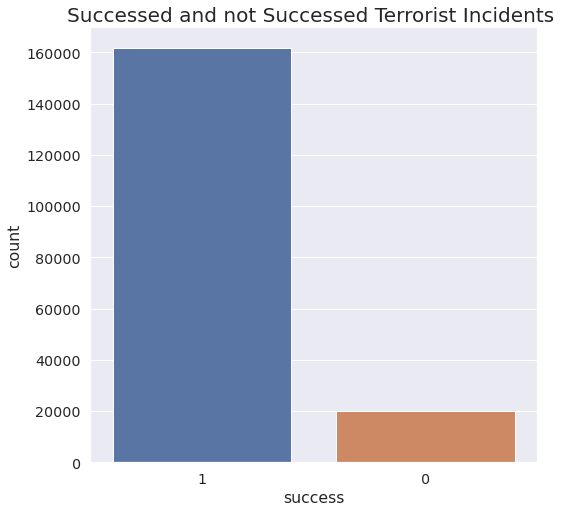

In [ ]:
sns.countplot(x = df['success'],order = df['success'].value_counts().index)
plt.title("Successed and not Successed Terrorist Incidents ", size=20)
plt.show()

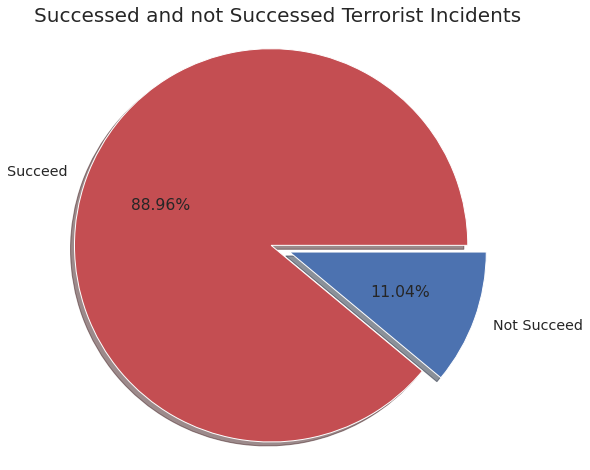

In [ ]:
plt.pie(df['success'].value_counts(),labels=['Succeed','Not Succeed'],
        autopct ='%1.2f%%',shadow = True, explode = [0,0.1],colors = ['r','b'])
plt.title("Successed and not Successed Terrorist Incidents ", size=20)
plt.axis('equal')
plt.show()

## **Terrorism in Regions and Countries**

### **For Regions**

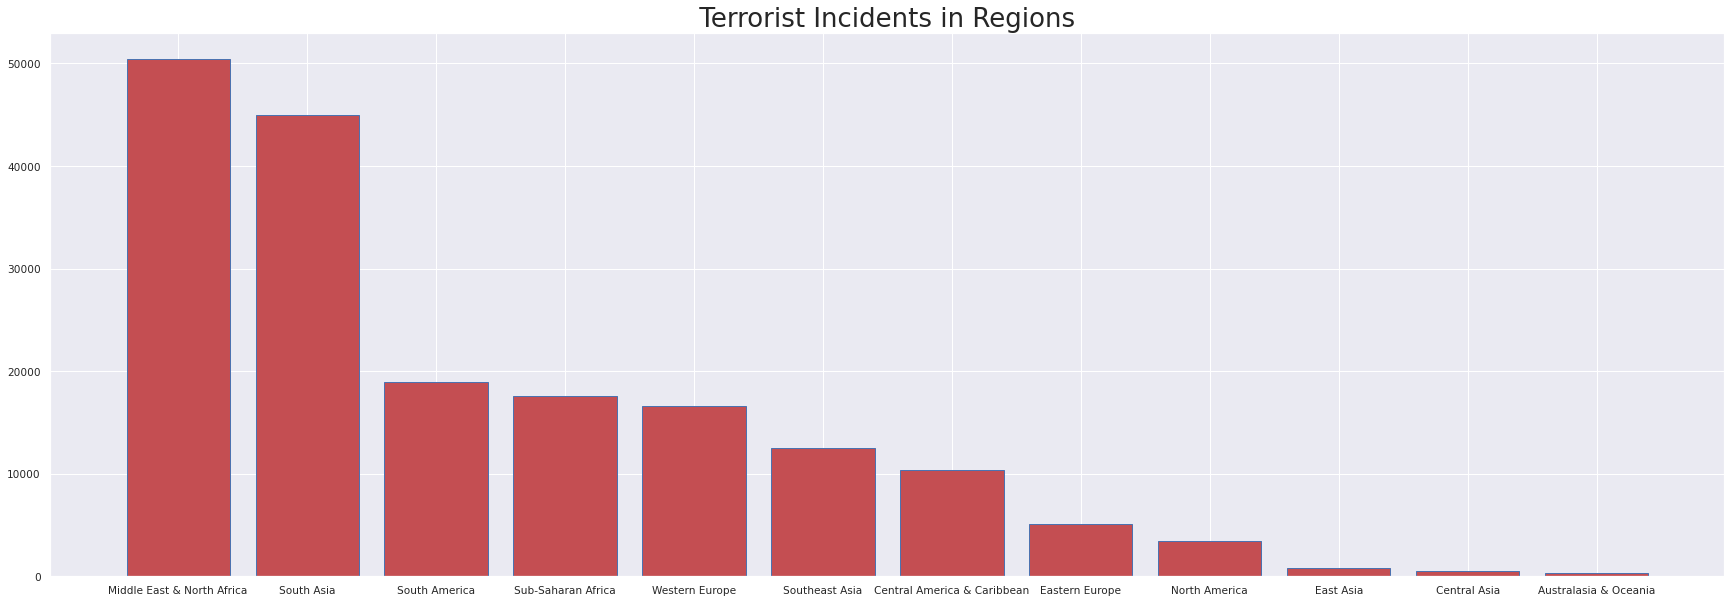

In [ ]:
sns.set(rc={'figure.figsize':(30, 10)}, font_scale=0.95)
plt.title(" Terrorist Incidents in Regions ", size=26)
plt.bar(df['region_txt'].value_counts().index,df['region_txt'].value_counts(),facecolor='r',edgecolor='b',width=0.8)
plt.show()

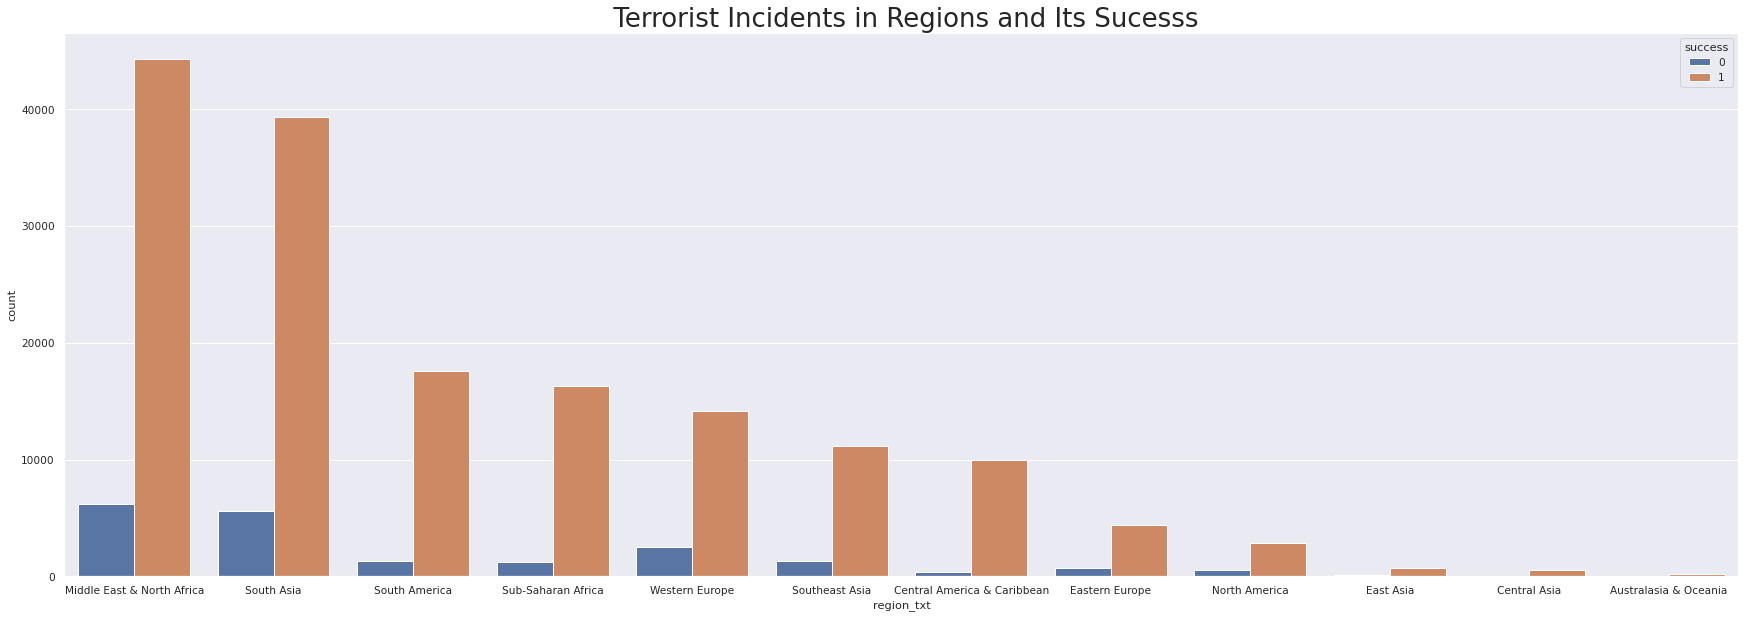

In [ ]:
plt.title(" Terrorist Incidents in Regions and Its Sucesss", size=26)
sns.countplot( x=df['region_txt'],hue=df['success'],order = df['region_txt'].value_counts().index)

### **For Countries**

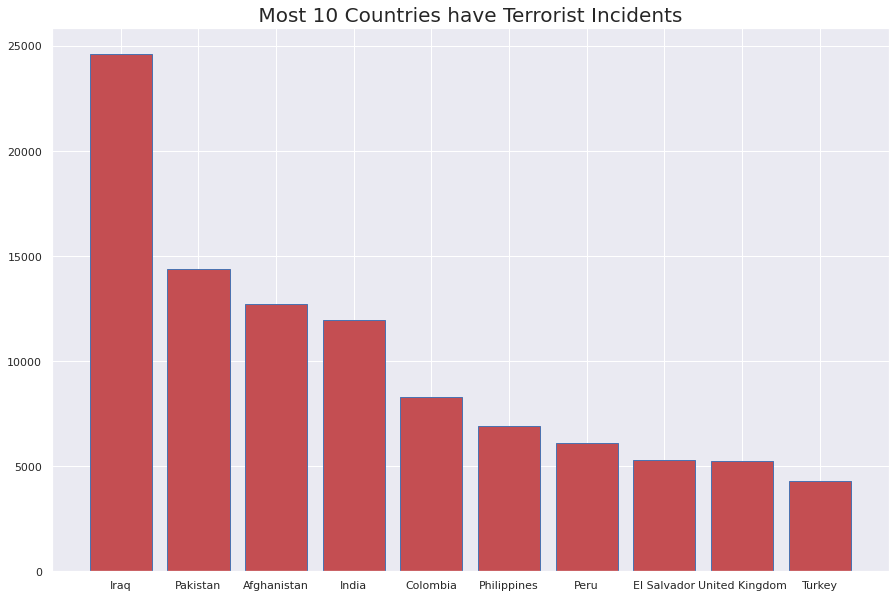

In [ ]:
sns.set(rc={'figure.figsize':(15, 10)}, font_scale=1)
plt.title(" Most 10 Countries have Terrorist Incidents ", size=20)
plt.bar(df['country_txt'].value_counts().head(10).index,df['country_txt'].value_counts().head(10),
        facecolor='r',edgecolor='b')
plt.show()

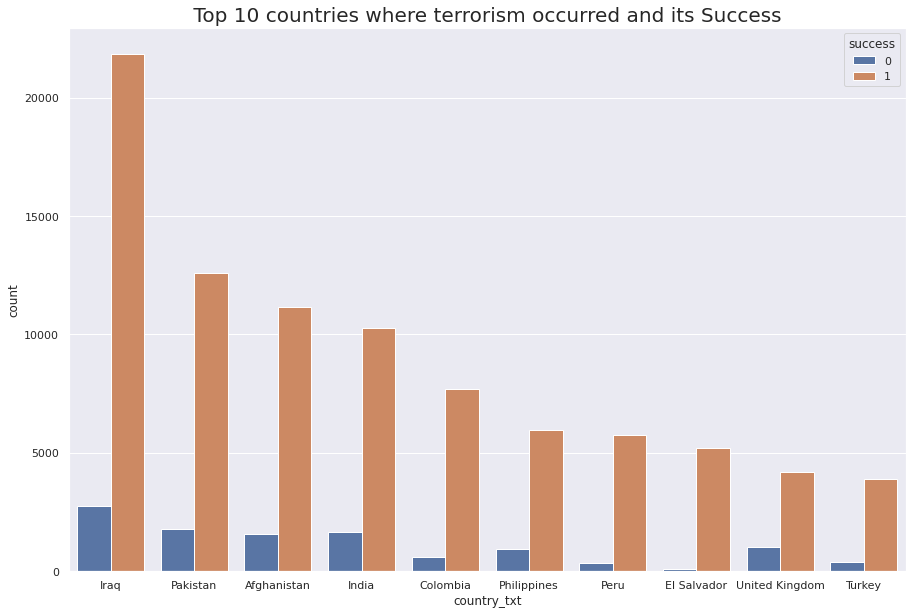

In [ ]:
plt.title(" Top 10 countries where terrorism occurred and its Success ", size=20)
sns.countplot(x="country_txt", hue="success", data=df,
              order=df.country_txt.value_counts().iloc[:10].index)

### **For Cities**

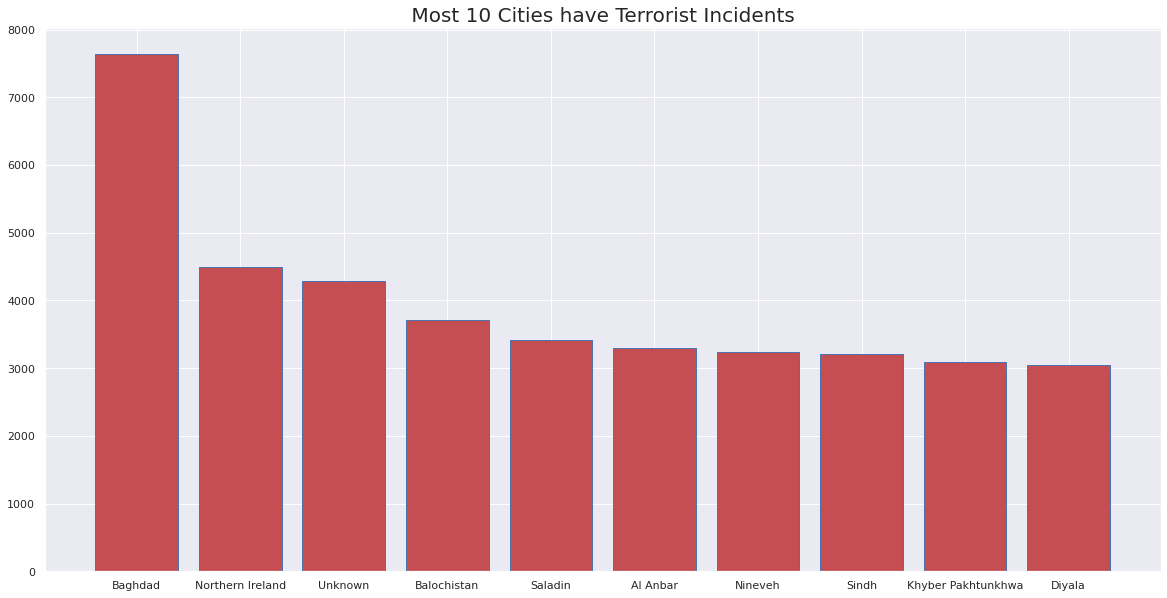

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=1)
plt.title(" Most 10 Cities have Terrorist Incidents ", size=20)
plt.bar(df['provstate'].value_counts().head(10).index,df['provstate'].value_counts().head(10),
        facecolor='r',edgecolor='b')
plt.show()

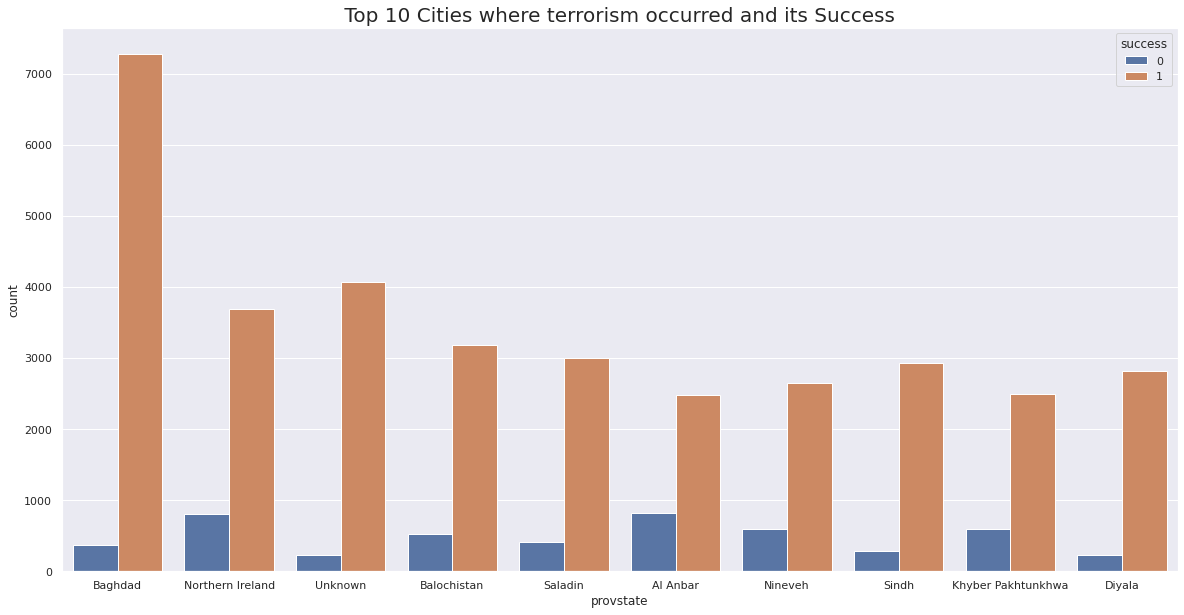

In [ ]:
plt.title(" Top 10 Cities where terrorism occurred and its Success ", size=20)
sns.countplot(x="provstate", hue="success", data=df,
              order=df.provstate.value_counts().iloc[:10].index)

##  **Terrorism via Years**

**terrorist incidents success from 1970 to 2018**

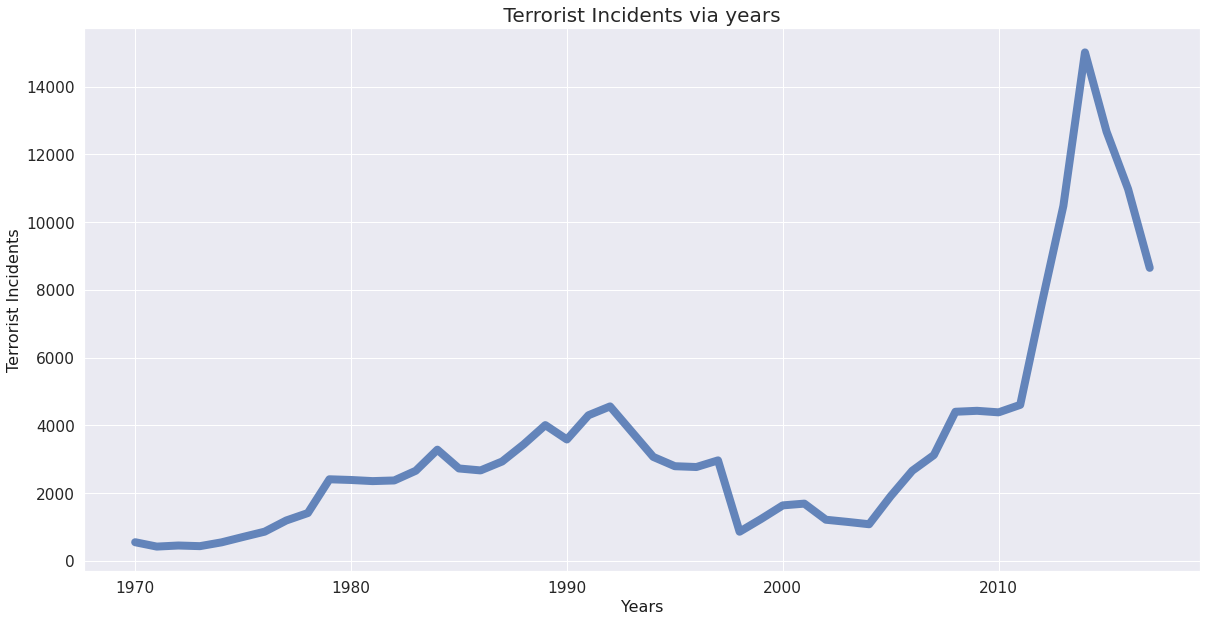

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=1.4)
plt.plot(df.groupby('iyear').sum()['success'],color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title(" Terrorist Incidents via years ", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Terrorist Incidents',color = 'k',size=16)
plt.show()

**kills number from 1970 to 2018 becuase of terrorist incidents**

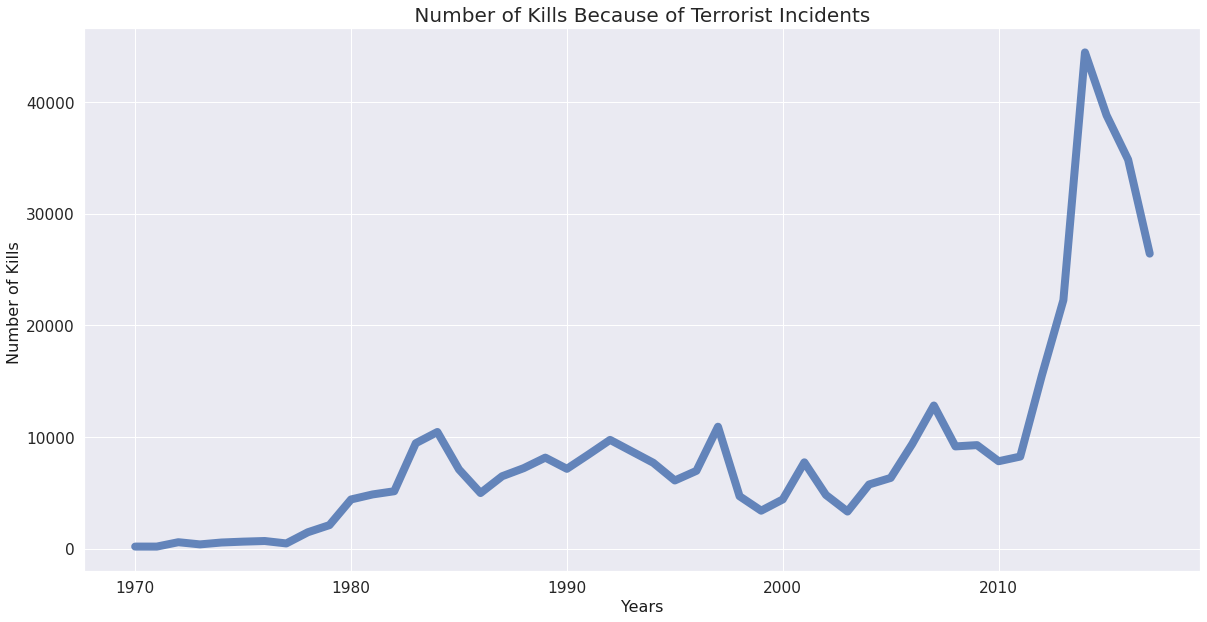

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)}, font_scale=1.4)
plt.plot(df.groupby('iyear').sum()['nkill'],color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title(" Number of Kills Because of Terrorist Incidents ", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Number of Kills ',color = 'k',size=16)
plt.show()

## **The Terrorist Incidents and Suicide Attacks**

**suicide attacks count from 1970 to 2018**

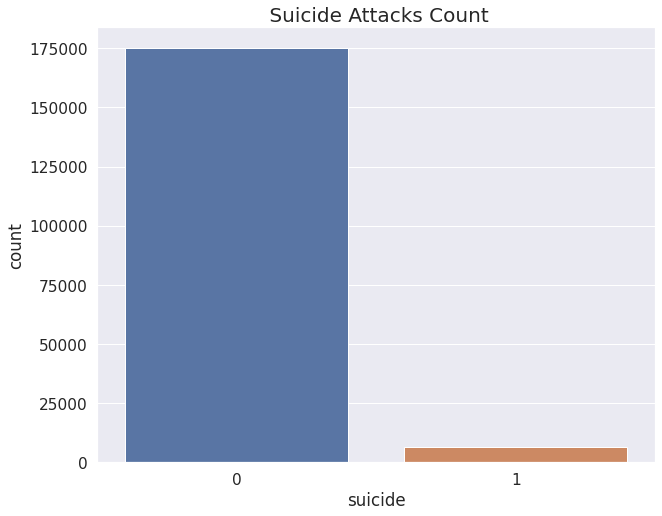

In [ ]:
sns.set(rc={'figure.figsize':(10, 8)}, font_scale=1.4)
plt.title(" Suicide Attacks Count", size=20)
sns.countplot(x="suicide",data=df,
              order=df.suicide.value_counts().index)

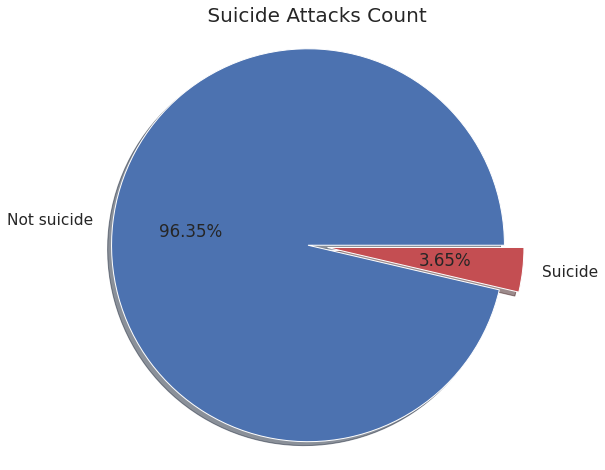

In [ ]:
plt.pie(df['suicide'].value_counts(),labels=['Not suicide','Suicide'],
        autopct ='%1.2f%%',shadow = True, explode = [0,0.1],colors = ['b','r'])
plt.title(" Suicide Attacks Count ", size=20)
plt.axis('equal')
plt.show()

**Relation between terrorist incidents success and is it suicide attacks or not**

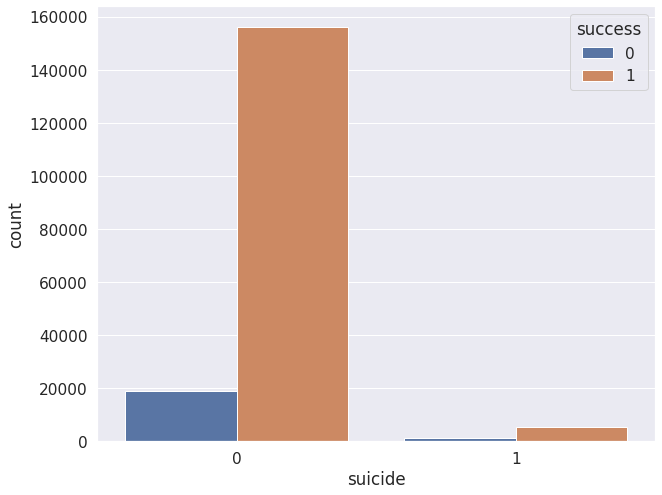

In [ ]:
sns.countplot(x="suicide", hue="success", data=df,
              order=df.suicide.value_counts().index)

## **Types of Terrorist Attacks**



**count of terrorist attacks types from 1970 to 2018**

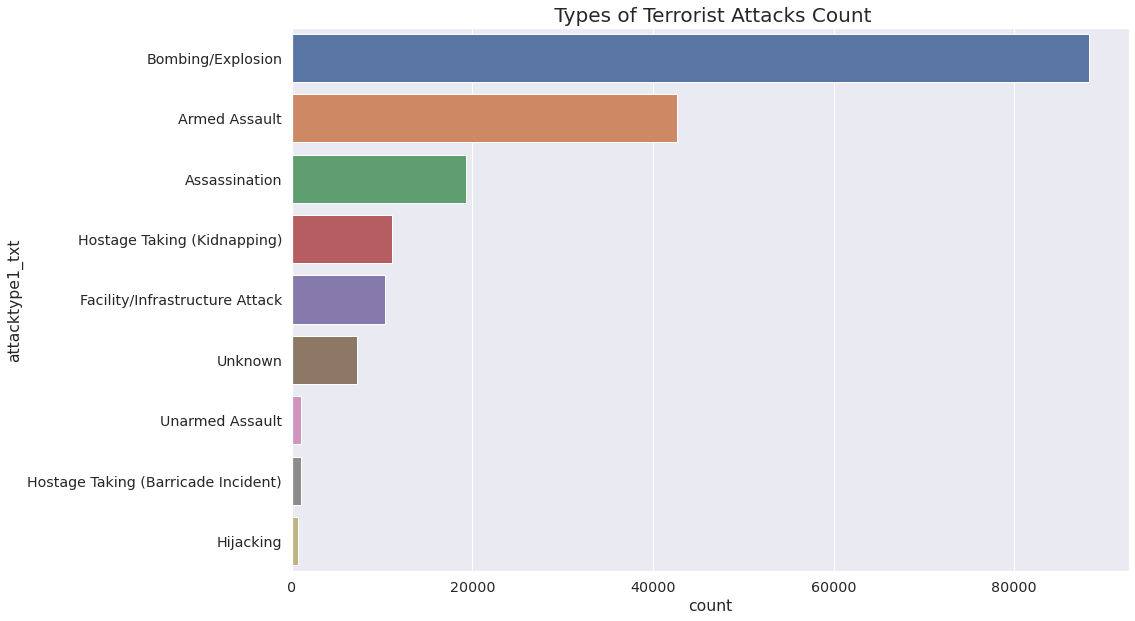

In [ ]:
sns.set(rc={'figure.figsize':(15, 10)}, font_scale=1.3)
plt.title(" Types of Terrorist Attacks Count", size=20)
sns.countplot(y="attacktype1_txt", data=df,
              order=df.attacktype1_txt.value_counts().index)

**Relation between terrorist incidents success and terrorist attacks type**

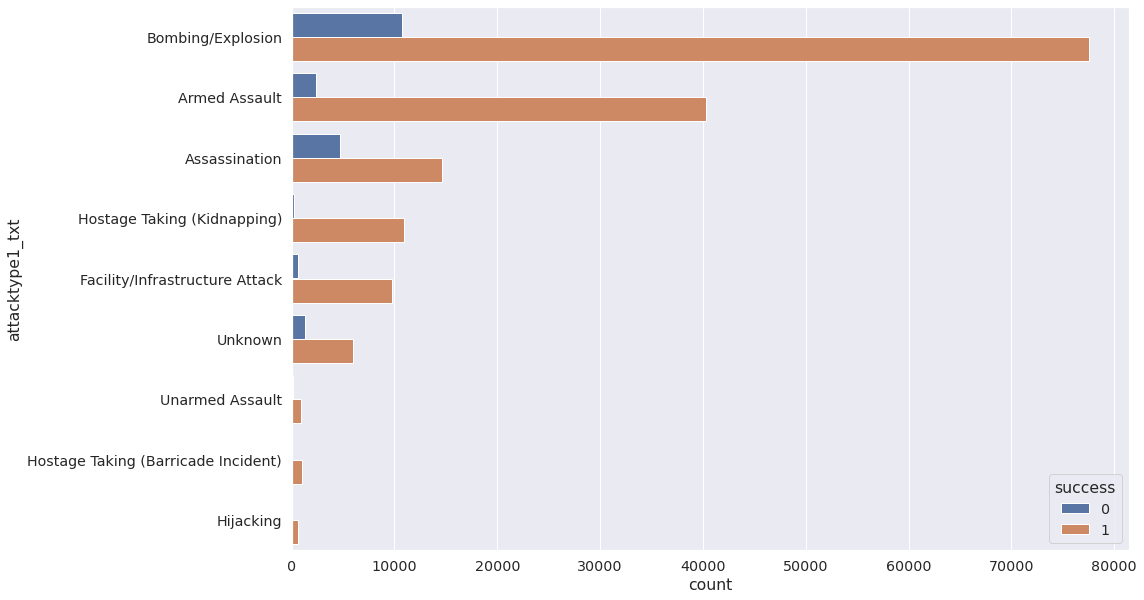

In [ ]:
sns.countplot(y="attacktype1_txt", data=df, hue = 'success',
              order=df.attacktype1_txt.value_counts().index)

## **Did terrorist incidents extend more than 24 hour ?**

**Count of extended terrorist incidents for more than 24 hours from 1970 to 2018**

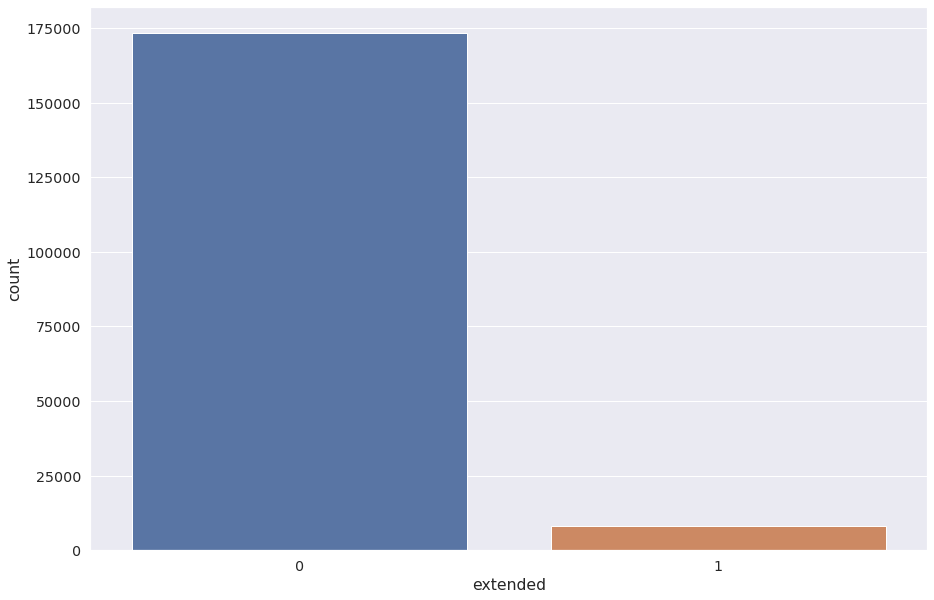

In [ ]:
sns.countplot(x=df['extended'])

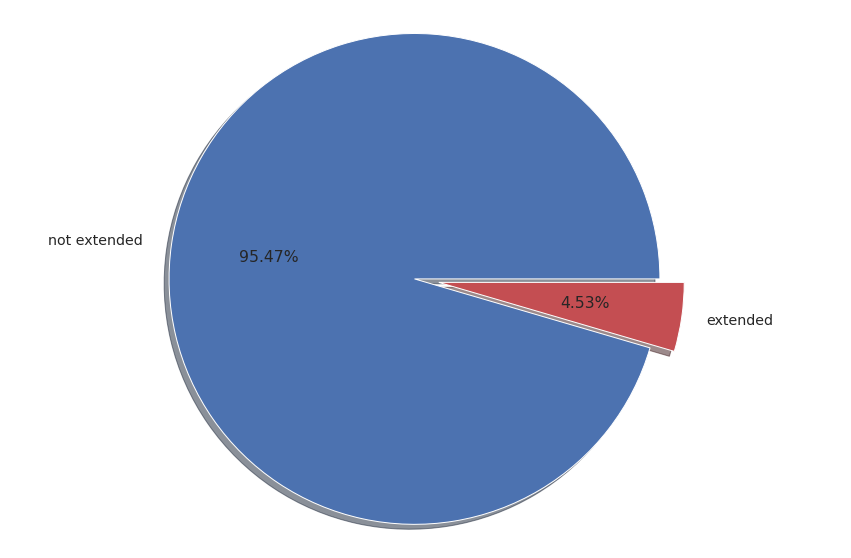

In [ ]:
plt.pie(df['extended'].value_counts(),labels=['not extended ','extended'],
        autopct ='%1.2f%%',shadow = True, explode = [0,0.1],colors = ['b','r'])
plt.axis('equal')
plt.show()

:**Relation between Extended terrorist incidents for more than 24 hours from 1970 to 2018 and terrorist incidents itself success**

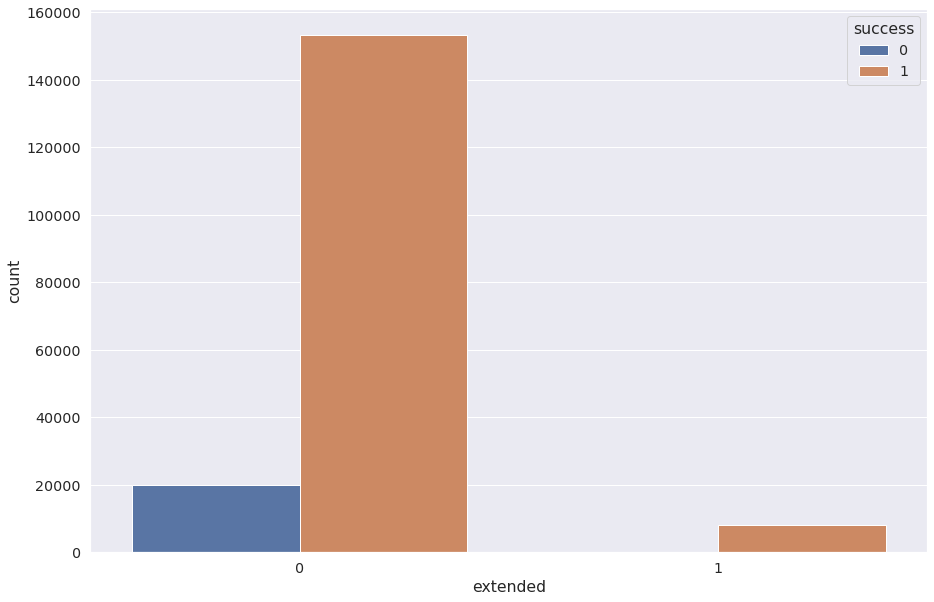

In [ ]:
sns.countplot(x=df['extended'],hue=df['success'])

## **What is the most five targets of terrorist attacks?**

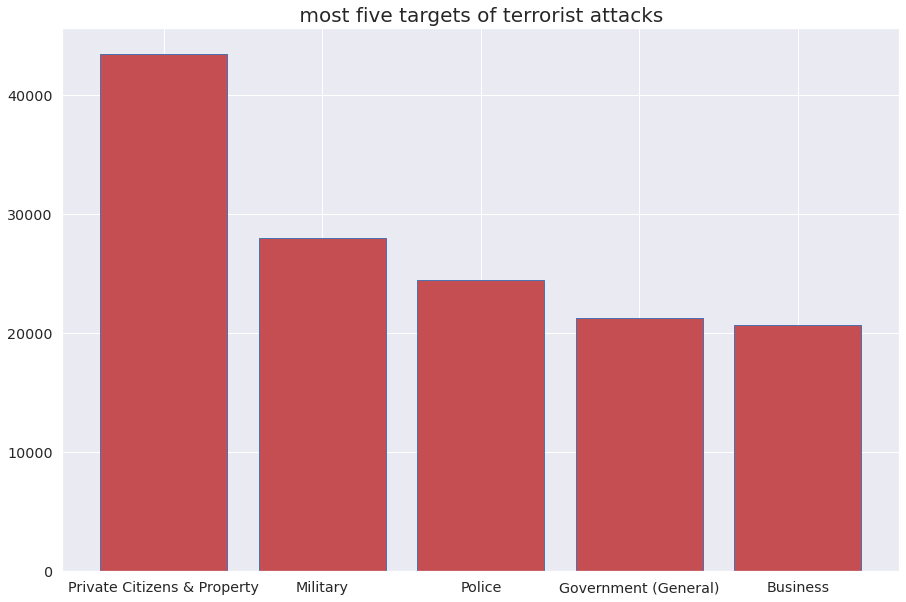

In [ ]:
plt.title(" most five targets of terrorist attacks ", size=20)
plt.bar(df['targtype1_txt'].value_counts().head(5).index,df['targtype1_txt'].value_counts().head(5),
        facecolor='r',edgecolor='b')
plt.show()

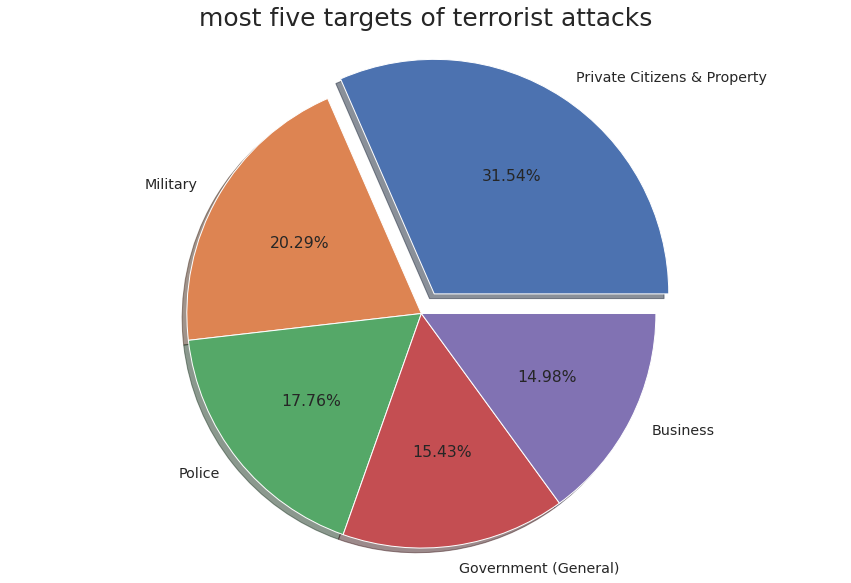

In [ ]:
plt.pie(df['targtype1_txt'].value_counts().head(5),labels=df['targtype1_txt'].value_counts().head(5).index,
        autopct ='%1.2f%%',shadow = True,explode=[0.1,0,0,0,0])
plt.axis('equal')
plt.title(" most five targets of terrorist attacks ", size=25)
plt.show()

## **what is most six groups that carried out terrorist attacks ?**

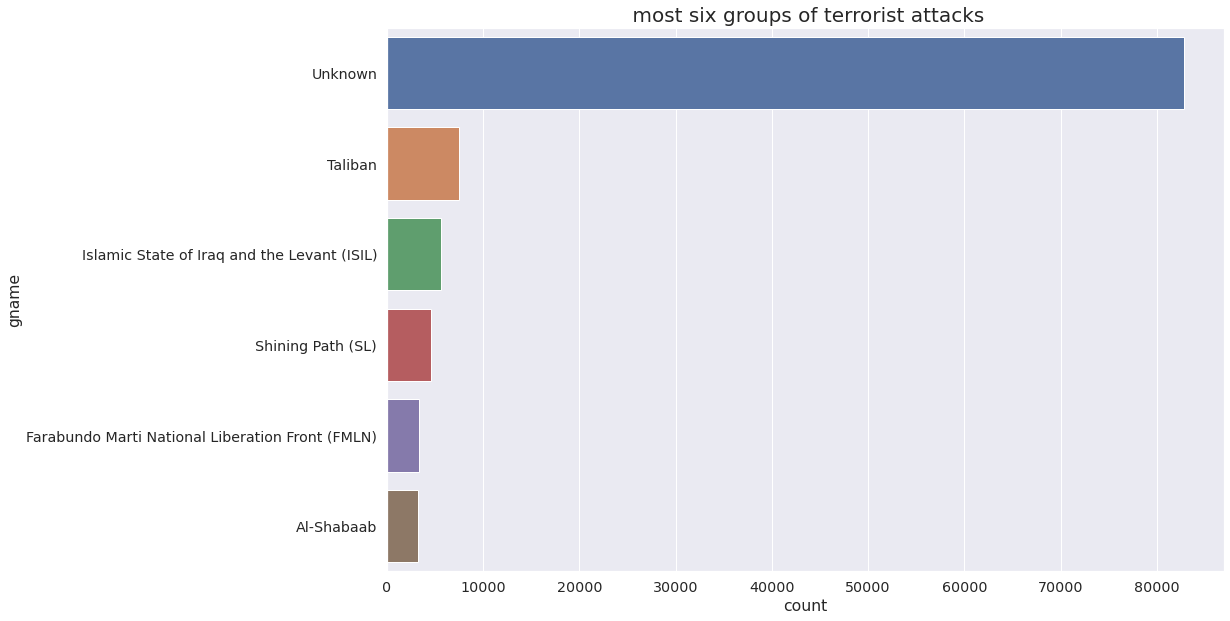

In [ ]:
plt.title(" most six groups of terrorist attacks", size=20)
sns.countplot(y="gname", data=df,
              order=df.gname.value_counts().iloc[:6].index)

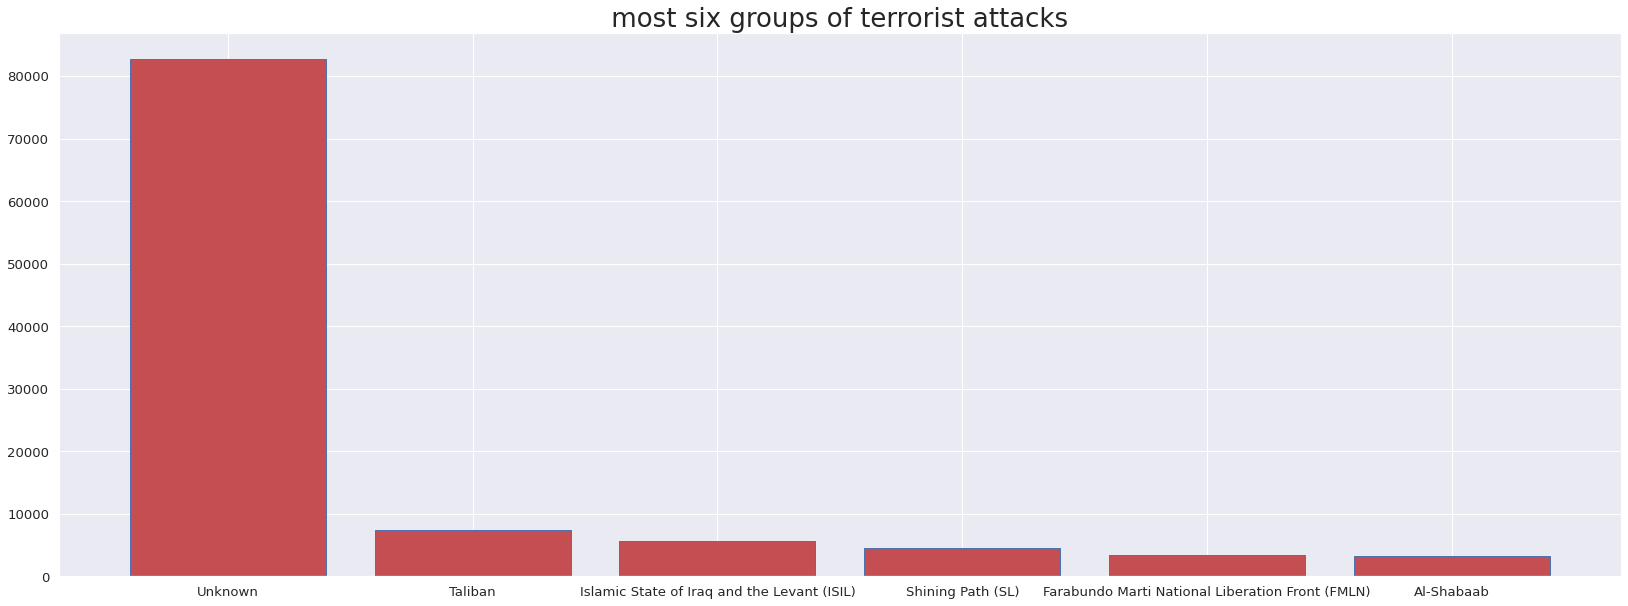

In [ ]:
sns.set(rc={'figure.figsize':(28, 10)}, font_scale=1.2)
plt.title(" most six groups of terrorist attacks ", size=26)
plt.bar(df['gname'].value_counts().head(6).index,df['gname'].value_counts().head(6),
        facecolor='r',edgecolor='b')
plt.show()

## **What is the most five type of weapons used in terrorist attacks?**

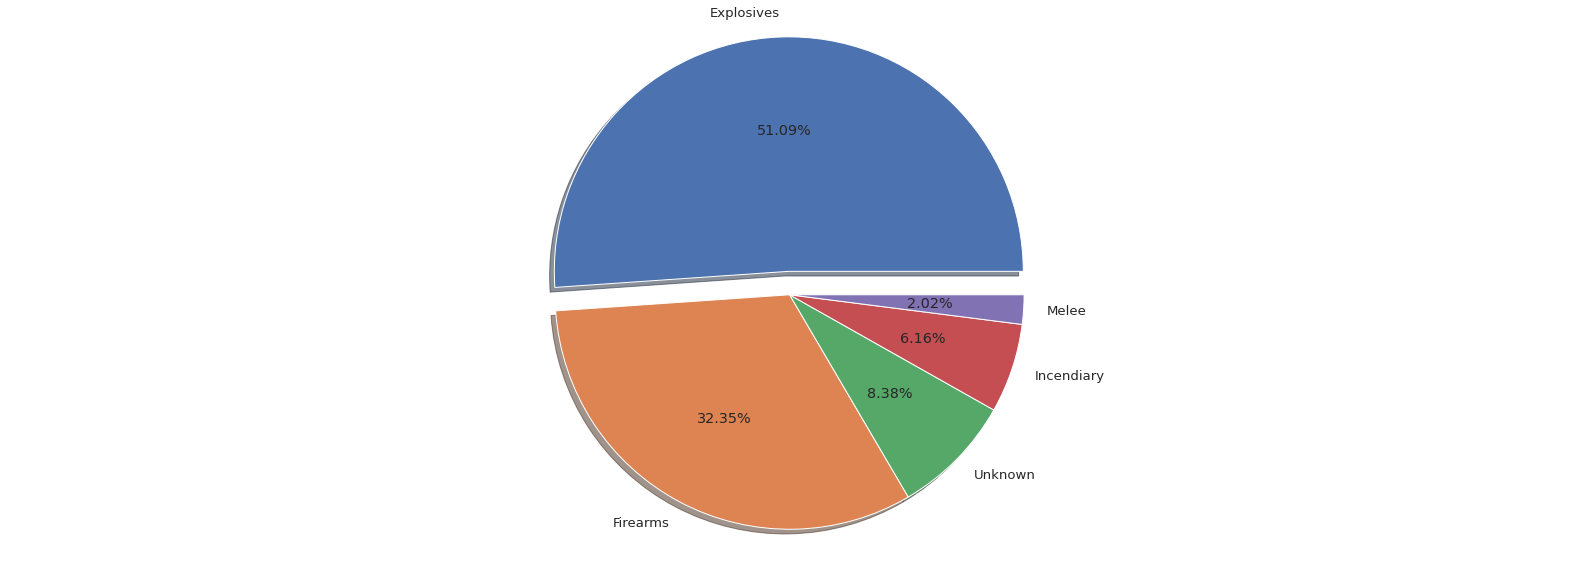

In [ ]:
plt.pie(df['weaptype1_txt'].value_counts().head(5),labels=df['weaptype1_txt'].value_counts().head(5).index,
        autopct ='%1.2f%%',shadow = True,explode=[0.1,0,0,0,0])
plt.axis('equal')
plt.show()

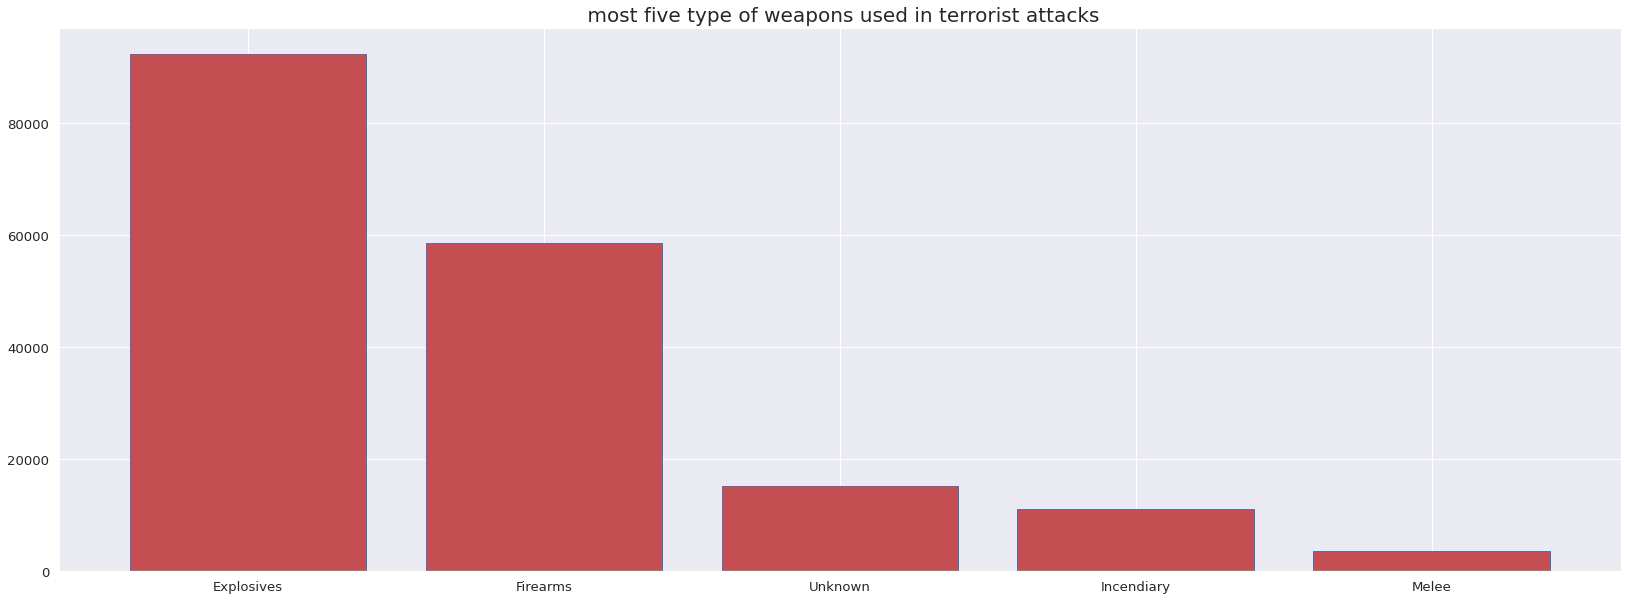

In [ ]:
plt.title(" most five type of weapons used in terrorist attacks", size=20)
plt.bar(df['weaptype1_txt'].value_counts().head(5).index,df['weaptype1_txt'].value_counts().head(5),
        facecolor='r',edgecolor='b')
plt.show()

**Relation between terrorist incidents success and most five type of weapons used in terrorist incidents**

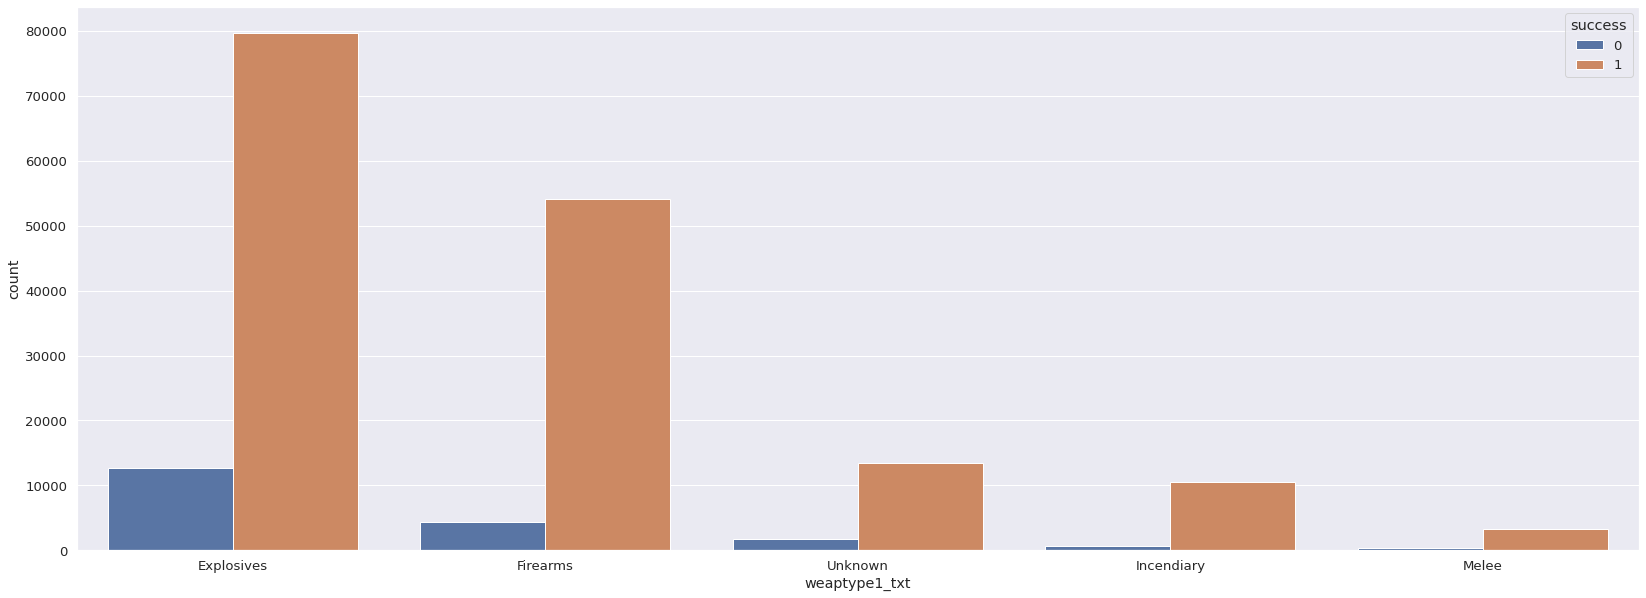

In [ ]:
sns.countplot(x="weaptype1_txt", hue="success", data=df,
              order=df.weaptype1_txt.value_counts().iloc[:5].index)

## **Final Quick Overview**



In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Preprocessing**

## **Data Cleaning**

In [ ]:
df['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [ ]:
df['iday'].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29])

**as we see , we've 0 in unique days or months values and this isn't realistic**

In [ ]:
df.shape

(181691, 39)

In [ ]:
df.drop(df[df['iday']==0].index,inplace=True)

In [ ]:
df.drop(df[df['imonth']==0].index,inplace=True)

In [ ]:
df.shape

(180800, 39)

## **Handling Missing Values**

In [ ]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
region_txt              0
provstate             418
city                  431
latitude             4469
longitude            4470
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt    10311
corp1               42118
target1               631
natlty1_txt          1539
gname                   0
guncertain1           380
individual              0
weaptype1_txt           0
weapsubtype1_txt    20440
nkill               10151
nwound              16128
property                0
ishostkid             175
dbsource                0
INT_LOG                 0
INT_IDEO                0
INT_MISC                0
INT_ANY     

In [ ]:
df['nkill'].unique()

array([1.000e+00, 0.000e+00,       nan, 7.000e+00, 4.700e+01, 2.000e+00,
       3.600e+01, 5.000e+00, 3.000e+00, 4.000e+00, 2.500e+01, 1.500e+01,
       2.600e+01, 8.000e+00, 8.100e+01, 6.000e+00, 9.000e+00, 1.600e+01,
       3.000e+01, 3.100e+01, 1.200e+01, 2.100e+01, 1.400e+01, 8.800e+01,
       1.100e+01, 1.000e+01, 2.700e+01, 1.800e+01, 2.200e+01, 1.900e+01,
       9.200e+01, 1.300e+01, 7.300e+01, 1.000e+02, 4.200e+01, 4.300e+01,
       1.700e+01, 9.800e+01, 4.220e+02, 4.800e+01, 3.400e+01, 5.400e+01,
       5.000e+01, 2.000e+01, 4.100e+01, 3.700e+01, 2.800e+01, 4.000e+01,
       3.200e+01, 8.500e+01, 2.300e+01, 3.000e+02, 3.500e+01, 6.000e+01,
       2.400e+01, 5.800e+01, 7.000e+01, 8.700e+01, 4.500e+01, 3.800e+01,
       2.900e+01, 7.400e+01, 8.300e+01, 9.000e+01, 6.600e+01, 8.000e+01,
       6.700e+01, 5.100e+01, 3.900e+01, 1.140e+02, 1.240e+02, 7.600e+01,
       3.300e+01, 7.500e+01, 5.700e+01, 6.200e+01, 4.600e+01, 5.600e+01,
       6.300e+01, 1.200e+02, 1.020e+02, 7.800e+01, 

In [ ]:
df['nwound'].unique()

array([0.000e+00,       nan, 1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00,
       1.700e+01, 5.000e+00, 3.000e+00, 1.000e+01, 1.200e+01, 2.000e+01,
       4.000e+00, 1.100e+01, 2.700e+01, 1.300e+01, 1.900e+01, 1.300e+02,
       5.600e+01, 2.400e+01, 6.000e+00, 7.200e+01, 2.380e+02, 5.500e+01,
       1.500e+01, 8.000e+00, 1.800e+01, 5.000e+01, 3.400e+01, 1.400e+01,
       7.000e+01, 1.020e+02, 4.100e+01, 4.800e+01, 3.600e+01, 2.500e+01,
       8.100e+01, 5.400e+01, 5.300e+01, 1.000e+02, 4.500e+01, 4.000e+01,
       6.200e+01, 7.400e+01, 2.200e+01, 3.100e+01, 1.600e+01, 3.000e+01,
       2.850e+02, 2.300e+01, 4.200e+01, 4.300e+01, 7.600e+01, 4.400e+01,
       5.200e+01, 4.600e+01, 4.900e+01, 1.600e+02, 3.700e+01, 2.100e+01,
       6.000e+01, 7.800e+01, 2.600e+01, 3.300e+01, 2.800e+01, 3.900e+01,
       3.800e+01, 3.500e+01, 3.200e+01, 8.000e+01, 4.700e+01, 1.880e+02,
       2.150e+02, 8.500e+01, 7.500e+01, 1.610e+02, 9.000e+01, 3.000e+02,
       9.500e+01, 1.350e+02, 6.100e+01, 1.380e+02, 

In [ ]:
df['guncertain1'].unique()

array([ 0.,  1., nan])

In [ ]:
df['doubtterr'].unique()

array([ 0.,  1., -9., nan])

In [ ]:
df['multiple'].unique()

array([ 0.,  1., nan])

In [ ]:
df['ishostkid'].unique()

array([ 0.,  1., nan, -9.])

In [ ]:
df.dropna(subset=['latitude', 'longitude','ishostkid','multiple','doubtterr','guncertain1','nwound','nkill'],inplace = True)

In [ ]:
df.shape

(159766, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159766 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             159766 non-null  int64  
 1   imonth            159766 non-null  int64  
 2   iday              159766 non-null  int64  
 3   extended          159766 non-null  int64  
 4   country_txt       159766 non-null  object 
 5   region_txt        159766 non-null  object 
 6   provstate         159389 non-null  object 
 7   city              159344 non-null  object 
 8   latitude          159766 non-null  float64
 9   longitude         159766 non-null  float64
 10  specificity       159766 non-null  float64
 11  vicinity          159766 non-null  int64  
 12  crit1             159766 non-null  int64  
 13  crit2             159766 non-null  int64  
 14  crit3             159766 non-null  int64  
 15  doubtterr         159766 non-null  float64
 16  multiple          15

In [ ]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
region_txt              0
provstate             377
city                  422
latitude                0
longitude               0
specificity             0
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt     9478
corp1               34712
target1               525
natlty1_txt          1445
gname                   0
guncertain1             0
individual              0
weaptype1_txt           0
weapsubtype1_txt    16078
nkill                   0
nwound                  0
property                0
ishostkid               0
dbsource                0
INT_LOG                 0
INT_IDEO                0
INT_MISC                0
INT_ANY     

In [ ]:
df.fillna('other',inplace =True)

In [ ]:
df.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country_txt         0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
corp1               0
target1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

In [ ]:
df.shape

(159766, 39)

## **Handling Categorical Data**

In [ ]:
list_categorical_columns = list(df.select_dtypes(include = 'object').columns)
list_categorical_columns

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'dbsource']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in list_categorical_columns :
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df

iyear  imonth  iday  extended  ...  INT_LOG  INT_IDEO  INT_MISC  INT_ANY
0        1970       7     2         0  ...        0         0         0        0
5        1970       1     1         0  ...       -9        -9         0       -9
6        1970       1     2         0  ...        0         0         0        0
7        1970       1     2         0  ...       -9        -9         0       -9
8        1970       1     2         0  ...        0         0         0        0
...       ...     ...   ...       ...  ...      ...       ...       ...      ...
181686   2017      12    31         0  ...        0         0         0        0
181687   2017      12    31         0  ...       -9        -9         1        1
181688   2017      12    31         0  ...        0         0         0        0
181689   2017      12    31         0  ...       -9        -9         0       -9
181690   2017      12    31         0  ...       -9        -9         0       -9

[159766 rows x 39 columns]

## Spliting

In [ ]:
x = df.drop(['success'],axis=1)

In [ ]:
x

iyear  imonth  iday  extended  ...  INT_LOG  INT_IDEO  INT_MISC  INT_ANY
0        1970       7     2         0  ...        0         0         0        0
5        1970       1     1         0  ...       -9        -9         0       -9
6        1970       1     2         0  ...        0         0         0        0
7        1970       1     2         0  ...       -9        -9         0       -9
8        1970       1     2         0  ...        0         0         0        0
...       ...     ...   ...       ...  ...      ...       ...       ...      ...
181686   2017      12    31         0  ...        0         0         0        0
181687   2017      12    31         0  ...       -9        -9         1        1
181688   2017      12    31         0  ...        0         0         0        0
181689   2017      12    31         0  ...       -9        -9         0       -9
181690   2017      12    31         0  ...       -9        -9         0       -9

[159766 rows x 38 columns]

In [ ]:
y = df['success']

In [ ]:
y

0         1
5         1
6         0
7         1
8         1
         ..
181686    1
181687    1
181688    1
181689    0
181690    0
Name: success, Length: 159766, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

In [ ]:
x_train

iyear  imonth  iday  extended  ...  INT_LOG  INT_IDEO  INT_MISC  INT_ANY
72662    2001       8    12         0  ...        1         0         0        1
151019   2015       7    25         0  ...        0         0         0        0
24526    1985       3     8         0  ...       -9        -9         0       -9
92318    2009       6    12         0  ...       -9        -9         0       -9
111430   2012      10     8         0  ...       -9        -9         0       -9
...       ...     ...   ...       ...  ...      ...       ...       ...      ...
39232    1989       8    15         0  ...        0         0         0        0
44252    1990      10    14         0  ...       -9        -9         0       -9
28549    1986       6    30         0  ...       -9        -9         1        1
43159    1990       7     2         0  ...        0         0         0        0
120674   2013       8    28         0  ...        0         1         0        1

[119824 rows x 38 columns]

In [ ]:
x_train.shape

(119824, 38)

In [ ]:
x_test

iyear  imonth  iday  extended  ...  INT_LOG  INT_IDEO  INT_MISC  INT_ANY
131698   2014       5    12         0  ...       -9        -9         0       -9
166657   2016       9     3         0  ...        1         0         0        1
90184    2009       1     3         0  ...        0         0         0        0
11972    1980      10     1         0  ...       -9        -9         0       -9
88195    2008       7    30         1  ...        0         1         1        1
...       ...     ...   ...       ...  ...      ...       ...       ...      ...
28032    1986       5    13         0  ...        0         0         0        0
107457   2012       5     2         0  ...       -9        -9         0       -9
81940    2006      11    30         0  ...       -9        -9         0       -9
82673    2007       3    27         0  ...       -9        -9         1        1
162231   2016       5     9         0  ...       -9        -9         0       -9

[39942 rows x 38 columns]

In [ ]:
x_test.shape

(39942, 38)

In [ ]:
y_train

72662     1
151019    0
24526     1
92318     1
111430    1
         ..
39232     1
44252     1
28549     1
43159     1
120674    1
Name: success, Length: 119824, dtype: int64

In [ ]:
y_train.shape

(119824,)

In [ ]:
y_test

131698    1
166657    0
90184     1
11972     1
88195     1
         ..
28032     1
107457    1
81940     1
82673     1
162231    1
Name: success, Length: 39942, dtype: int64

In [ ]:
y_test.shape

(39942,)

# **Modelling and Evalution**  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
models = {
    "LR": LogisticRegression(max_iter = 5000, C =1),
    "RF": RandomForestClassifier(n_estimators=100),
    "DT": DecisionTreeClassifier(),
    "GradientBoosting"  :  GradientBoostingClassifier(),
    "XGB": XGBClassifier(n_estimators=100)
}

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {model.score(x_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('-'*70)

Training Model LR 
-----------------------------------------------
Training Accuracy: 0.880533115235679
Testing Accuracy: 0.8817285063341845
Testing Confusion Matrix: 
[[    0  4722]
 [    2 35218]]
----------------------------------------------------------------------
Training Model RF 
-----------------------------------------------
Training Accuracy: 0.9997162505007344
Testing Accuracy: 0.9584147013169095
Testing Confusion Matrix: 
[[ 3500  1222]
 [  439 34781]]
----------------------------------------------------------------------
Training Model DT 
-----------------------------------------------
Training Accuracy: 0.9997329416477501
Testing Accuracy: 0.9304491512693406
Testing Confusion Matrix: 
[[ 3424  1298]
 [ 1480 33740]]
----------------------------------------------------------------------
Training Model GradientBoosting 
-----------------------------------------------
Training Accuracy: 0.946663439711577
Testing Accuracy: 0.9473987281558259
Testing Confusion Matrix: 
[[ 329

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Frist 10 Real Outputs in Testing : \n ', y_test[:10].values)
print('--'*50)
print('Frist 10 Predicated Outputs in Testing : \n ', y_pred[:10])

Frist 10 Real Outputs in Testing : 
  [1 0 1 1 1 1 1 1 1 1]
----------------------------------------------------------------------------------------------------
Frist 10 Predicated Outputs in Testing : 
  [1 0 1 1 1 1 1 1 1 1]


In [ ]:
y_compare={'y_test':y_test, 'y_predicted':y_pred}
pd.DataFrame(y_compare)

y_test  y_predicted
131698       1            1
166657       0            0
90184        1            1
11972        1            1
88195        1            1
...        ...          ...
28032        1            1
107457       1            0
81940        1            1
82673        1            1
162231       1            1

[39942 rows x 2 columns]

In [ ]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  0.9997329416477501
----------------------------------------------------------------------------------------------------
Testing Score is :  0.9586149917380201


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
print('confusion Matrix :')  
print('--'*30)
print(confusion_matrix(y_test,y_pred))

confusion Matrix :
------------------------------------------------------------
[[ 3489  1233]
 [  420 34800]]


In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual Labels'
df_cm.columns.name = 'Predicted Labels'
df_cm

Predicted Labels     0      1
Actual Labels                
0                 3489   1233
1                  420  34800

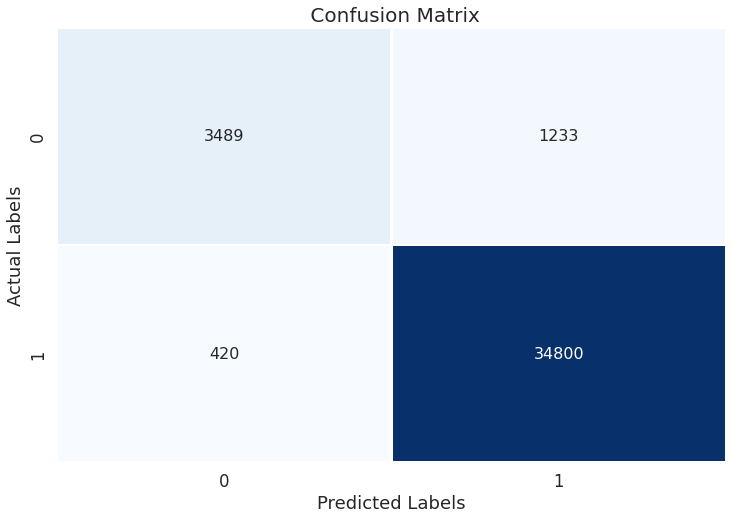

In [ ]:
sns.set(rc={'figure.figsize':(12, 8)}, font_scale=1.5)
plt.title(" Confusion Matrix", size=20)
sns.heatmap( df_cm,cmap='Blues', annot=True,annot_kws={"size": 16},fmt='',
            linewidths=1.3,cbar=False , linecolor = 'w')

In [ ]:
matrix = classification_report(y_test,y_pred)
print('Classification report :')
print('--'*30)
print(matrix)


Classification report :
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      4722
           1       0.97      0.99      0.98     35220

    accuracy                           0.96     39942
   macro avg       0.93      0.86      0.89     39942
weighted avg       0.96      0.96      0.96     39942

